In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cats_length = len(os.listdir(train_cats_dir))
train_dogs_length = len(os.listdir(train_dogs_dir))
validation_cats_length = len(os.listdir(validation_cats_dir))
validation_dogs_length = len(os.listdir(validation_dogs_dir))

total_train = train_cats_length + train_dogs_length
total_validation = validation_cats_length + validation_dogs_length

In [6]:
print('total training cat images:', train_cats_length)
print('total training dog images:', train_cats_length)

print('total validation cat images:', validation_cats_length)
print('total validation dog images:', validation_dogs_length)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
batch_size = 128
epochs = 1
img_height = 50
img_width = 50

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(img_height, img_width),
                                                          class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [10]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                                    directory=validation_dir,
                                                                    shuffle=True,
                                                                    target_size=(img_height, img_width),
                                                                    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [11]:
#The next function returns a batch from the dataset. The return value of next function is in form of
#(x_train, y_train) where x_train is training features and y_train, its labels. Discard the labels to 
#only visualize the training images.
sample_training_images, _ = next(train_data_gen)

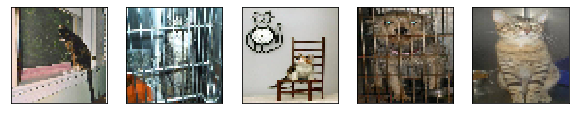

In [12]:
plt.figure(figsize=(10,10))
for x in range(5):
    plt.subplot(1,5,x+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_training_images[x])
plt.show()

In [13]:
#model
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [16]:
# Use the fit_generator method of the ImageDataGenerator class to train the network.
history = model.fit_generator(
train_data_gen,
steps_per_epoch = total_train, # batch size
epochs=epochs,
validation_data = validation_data_gen,
validation_steps = total_validation) # batch size

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2000 steps, validate for 1000 steps
  16/2000 [..............................] - ETA: 2:19:04 - loss: 0.7112 - accuracy: 0.5040